# COMPARAÇÃO DE MODELOS PREDITIVOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"]=[10,7]
plt.rcParams.update({"font.size":18})

In [2]:
url = "vinhos-binario.csv"
df = pd.read_csv(url, sep=",")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_atributos = df.iloc[:,:11]
df_classes = df["quality"]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(df_atributos,df_classes,train_size=0.9)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
# KNN
model_KNN = KNeighborsClassifier(n_neighbors = 20)
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [22]:
predicao_KNN = model_KNN.predict(X_test)
acuracia_KNN = accuracy_score(y_test,predicao_KNN)
acuracia_KNN

0.78125

In [23]:
print(classification_report(y_test,predicao_KNN))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77        75
           1       0.80      0.79      0.79        85

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.78      0.78      0.78       160



In [24]:
cross_val_score(model_KNN, X_train, y_train, cv=10)

array([0.70833333, 0.75694444, 0.625     , 0.75694444, 0.74305556,
       0.75694444, 0.71527778, 0.76388889, 0.74305556, 0.73426573])

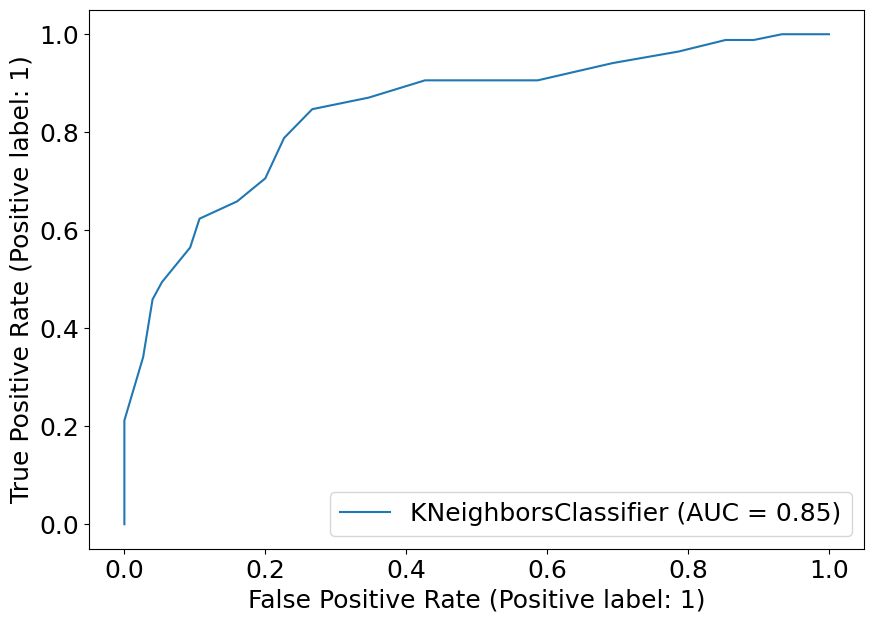

In [25]:
RocCurveDisplay.from_estimator(model_KNN.fit(X_train,y_train),X_test,y_test)
plt.show()

In [26]:
# SVM
model_SVM = SVC(kernel="linear")
model_SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
predicao_SVM = model_SVM.predict(X_test)
acuracia_SVM = accuracy_score(y_test, predicao_SVM)
acuracia_SVM

0.7625

In [28]:
print(classification_report(y_test,predicao_SVM))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        75
           1       0.81      0.72      0.76        85

    accuracy                           0.76       160
   macro avg       0.77      0.77      0.76       160
weighted avg       0.77      0.76      0.76       160



In [29]:
cross_val_score(model_SVM, X_train, y_train, cv=10)

array([0.76388889, 0.71527778, 0.63194444, 0.78472222, 0.74305556,
       0.76388889, 0.77083333, 0.75694444, 0.74305556, 0.72727273])

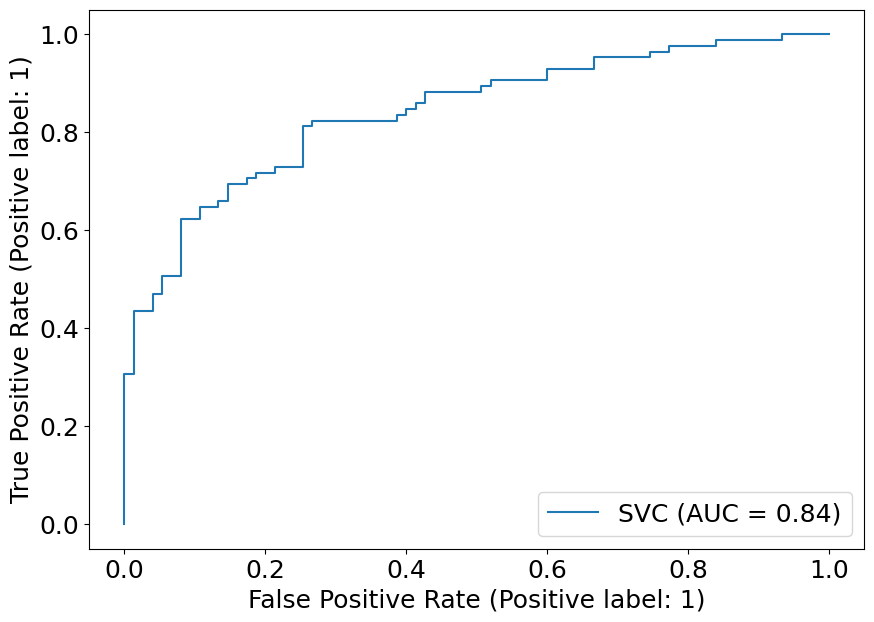

In [30]:
RocCurveDisplay.from_estimator(model_SVM.fit(X_train,y_train),X_test,y_test)
plt.show()

In [31]:
# Random Forests
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
predicao_RF = model_RF.predict(X_test)
acuracia_RF = accuracy_score(y_test,predicao_RF)
acuracia_RF

0.8375

In [33]:
print(classification_report(y_test,predicao_RF))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        75
           1       0.90      0.78      0.84        85

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160



In [34]:
cross_val_score(model_RF, X_train, y_train, cv=10)

array([0.77083333, 0.8125    , 0.67361111, 0.84027778, 0.81944444,
       0.86111111, 0.85416667, 0.82638889, 0.83333333, 0.8041958 ])

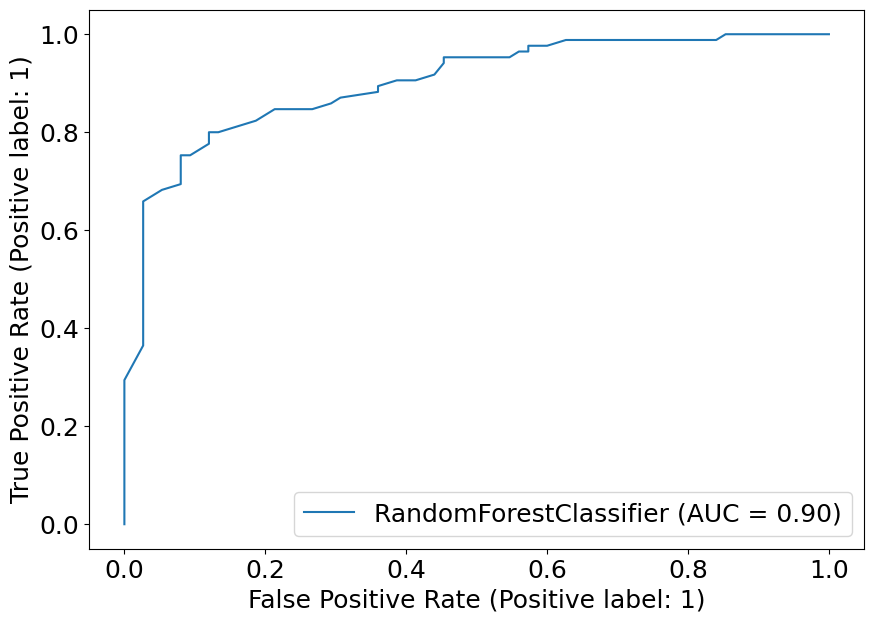

In [36]:
RocCurveDisplay.from_estimator(model_RF.fit(X_train,y_train),X_test,y_test)
plt.show()